<a href="https://colab.research.google.com/github/DhaniAAA/Scrapping-Ulasan/blob/main/Teks_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE

import numpy as np
import pandas as pd

In [2]:
!pip install sastrawi emoji deep_translator langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.5 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=b7e4e415f441f85838a66feb8c0e2d5183cbca3e477e82f7c4797ef6a3cc83af
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [3]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')  # Download data yang diperlukan untuk tokenisasi
nltk.download('punkt_tab') # This line is crucial to fix the error
#stemmer = PorterStemmer()
#lemmatizer = WordNetLemmatizer()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

nltk.download('stopwords')
nltk.download('wordnet')

# Inisialisasi penghapus stopwords
stopword_factory = StopWordRemoverFactory()
stopwords = set(stopword_factory.get_stop_words())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#CONVERT EMOJI
import csv
import emoji

# Baca data dari file asli
input_file = '/content/IndonesiaGelap 1.csv'
output_file = '/content/Book1_updated.csv'

# Membaca file CSV dan mengambil hanya kolom 'tweet'
with open(input_file, mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)  # Gunakan DictReader untuk akses berdasarkan nama kolom
    komentar = [row['tweet'] for row in reader if 'tweet' in row and row['tweet'].strip() != '']

# Menulis hasil yang telah dikonversi
with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['tweet'])  # Header kolom hasil

    for text in komentar:
        # Konversi emoji ke teks deskriptif
        text_with_descriptions = emoji.demojize(text, language='id')
        writer.writerow([text_with_descriptions])
        print(text_with_descriptions)

print(f"Proses selesai! File yang diperbarui disimpan sebagai '{output_file}'.")


In [ ]:
# Membaca stopwords dari file
with open('/content/id.stopwords.02.01.2016.txt', 'r') as file:
    custom_stopwords = set(word.strip() for word in file.readlines())

In [ ]:
import emoji
import pandas as pd

# Load data
#file_path = '/content/komentar.csv'
#comments_df = pd.read_csv(file_path)

# Fungsi untuk mengubah emoji ke teks
def emoji_to_text(text):
    if isinstance(text, float):
        text = str(text)  # Convert float to string if necessary
    return emoji.demojize(text, language='id')
# Terapkan fungsi ke kolom 'comments'
df['Content'] = df['full_text'].apply(emoji_to_text)

# Save to a new CSV file
output_path = '/content/komentar_translated.csv'
df.to_csv(output_path, index=False)

In [ ]:
df2 = pd.read_csv("/content/komentar_translated.csv")
df2

,uniqueId,text
0,ntaanetaa1,ini bener aku 18 dpt 12 apa 1 bungkus
1,voyycruchy2,aku dapet 24 ribu kakk
2,senyumin.aja28,aku dapet 20k kak😁
3,aprianti2014,aku dapet 19k😱😱
4,nna21936,terimakasih kakak
5,woo_seok08,menangis 45k 😭😭
6,ema.yati40,back😁
7,maznajazila,aku dapet harga 25
8,z_ukaa2,10 rb


In [ ]:
from langdetect import detect
import pandas as pd

# Membaca data dari CSV
df = pd.read_csv('/content/cleaned_tweets.csv')

# Fungsi untuk mendeteksi bahasa
def detect_language(text):
    try:
        return detect(str(text))  # Deteksi bahasa
    except:
        return "unknown"  # Jika gagal deteksi, tandai sebagai "unknown"

# Tambahkan kolom baru dengan hasil deteksi bahasa
df['detected_lang'] = df['clean_text'].apply(detect_language)

# Tampilkan jumlah baris berbahasa Inggris sebelum dihapus
english_rows = df[df['detected_lang'] == 'en']
print(f"Ditemukan {len(english_rows)} baris berbahasa Inggris.")
print(english_rows[['clean_text', 'detected_lang']].head())

# Hapus baris yang berbahasa Inggris
df = df[df['detected_lang'] != 'en']

# (Opsional) Hapus juga kolom 'detected_lang' jika tidak dibutuhkan
df = df.drop(columns=['detected_lang'])

# Simpan hasil akhir ke file baru
df.to_csv('/content/cleaned_tweets_filtered.csv', index=False)
print(f"File disimpan sebagai 'cleaned_tweets_filtered.csv' dengan {df.shape[0]} baris.")


Ditemukan 15 baris berbahasa Inggris.
                                            clean_text detected_lang
96                 foto sangat powerful indonesiagelap            en
164  press release bareng warga explanation and dem...            en
295  for indonesian plli do you think its coinciden...            en
336  jepang bukan this is indonesia indonesia no en...            en
928  baru tren l indonesia galderma x joongdunk ind...            en


In [ ]:
#Only Processing
import re
import emoji
from langdetect import detect
from deep_translator import GoogleTranslator

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer dan stopwords bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

# Fungsi pre-processing lengkap
def preprocess_text(text):
    text = str(text)

    # Bersihkan URL, mention, angka, hashtag
    text = re.sub(r'http\S+|www\S+|@\w+|\d+|#', '', text)

    # Konversi emoji ke deskripsi
    text = emoji.demojize(text).replace("_", " ").replace(":", " ")

    # Translasi jika bahasa Inggris
    try:
        if detect(text) == 'en':
            text = GoogleTranslator(source='en', target='id').translate(text)
    except:
        pass

    # Hapus karakter selain huruf dan spasi
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Lowercase & strip
    text = text.lower().strip()

    # Tokenizing
    tokens = word_tokenize(text)

    # Stopword removal
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(stemmed_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [ ]:
#Only Cleaning,case folding, emoji, translator.
import re
import emoji
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator

# Fungsi untuk membersihkan teks dan menerjemahkan jika diperlukan
def clean_tweet(text):
    text = str(text)  # Pastikan teks dalam format string
    text = re.sub(r'http\S+|www\S+|@\w+|\d+|#', '', text)  # Hapus URL, mention, angka, hashtag

    # Ubah emoji menjadi teks deskripsi
    text = emoji.demojize(text).replace("_", " ").replace(":", " ")

    # Cek apakah teks dominan berbahasa Inggris sebelum diterjemahkan
    try:
        if detect(text) == 'en':
            text = GoogleTranslator(source='en', target='id').translate(text)
    except:
        pass  # Jika gagal deteksi, biarkan tetap seperti aslinya

    # Menghapus karakter khusus kecuali huruf dan spasi
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Mengonversi ke huruf kecil dan menghapus spasi berlebih
    return text.lower().strip()

# Membaca data dari CSV
df = pd.read_csv('/content/Data Merge - Date-user-tweet.csv')

# Membersihkan teks di kolom 'full_text' dan menerjemahkan jika perlu
df['clean_text'] = df['tweet'].astype(str).apply(clean_tweet)

# Menghapus baris duplikat (hanya menyimpan yang pertama)
df = df.drop_duplicates(keep='first')

# Menghapus baris yang masih mengandung bahasa Inggris setelah translasi
def is_english(text):
    try:
        return detect(text) == 'en'  # Jika masih bahasa Inggris, True
    except:
        return False  # Jika gagal deteksi, anggap bukan bahasa Inggris

df = df[~df['clean_text'].apply(is_english)]  # Hapus baris yang masih berbahasa Inggris

# Menghapus baris yang memiliki nilai kosong
df = df.dropna()

# Menyimpan hasil ke file baru
df.to_csv('cleaned_tweets.csv', index=False)

print(f"Pembersihan selesai. Dataset akhir: {df.shape[0]} baris, {df.shape[1]} kolom.")
print("File disimpan sebagai 'cleaned_tweets.csv'.")


Pembersihan selesai. Dataset akhir: 2777 baris, 4 kolom.
File disimpan sebagai 'cleaned_tweets.csv'.


In [ ]:
#Full
import re
import emoji
import pandas as pd
import nltk
from langdetect import detect
from deep_translator import GoogleTranslator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords

nltk.download('punkt')

# Inisialisasi tools
stemmer = StemmerFactory().create_stemmer()
stopword_factory = StopWordRemoverFactory()
stopwords_id = set(stopword_factory.get_stop_words())
translator = GoogleTranslator(source='en', target='id')

# Fungsi membersihkan dan menerjemahkan teks
def clean_and_translate(text):
    if pd.isnull(text) or not isinstance(text, str):
        return ""  # Jika bukan string, kembalikan teks kosong

    text = re.sub(r"http\S+|www\S+|@\w+|\d+|#", "", text)
    text = emoji.demojize(text).replace("_", " ").replace(":", " ")

    try:
        if detect(text) == 'en':
            text = translator.translate(text)
    except:
        pass

    text = re.sub(r"[^a-zA-Z\s]", "", text).lower().strip()
    return text

# Fungsi untuk tokenizing, stopword removal, dan stemming
def tokenize_stem_stopwords(text):
    if pd.isnull(text) or not isinstance(text, str):
        return ""
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stopwords_id]
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

# === Proses utama ===
df = pd.read_csv('/content/Data Merge - Date-user-tweet.csv')

# Pastikan kolom 'tweet' tidak kosong
df = df[df['tweet'].notnull()]

# Bersihkan dan terjemahkan teks
df['clean_text'] = df['tweet'].astype(str).apply(clean_and_translate)

# Tokenizing + stemming + stopword removal
df['clean_text'] = df['clean_text'].apply(tokenize_stem_stopwords)

# Hapus duplikat dan nilai kosong
df = df.drop_duplicates(subset='clean_text', keep='first')
df = df.dropna(subset=['clean_text'])

# Simpan ke file
df.to_csv('cleaned_tweets.csv', index=False)

print(f"✅ Selesai! Dataset akhir: {df.shape[0]} baris, {df.shape[1]} kolom.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Selesai! Dataset akhir: 2590 baris, 4 kolom.


In [ ]:
df= pd.read_csv("/content/cleaned_tweets.csv")
df

,username,created_at,tweet,clean_text
0,TxtdariHI,Fri Feb 21 09:06:15 +0000 2025,#IndonesiaGelap Goes Global https://t.co/fHtwi...,indonesiagelap goes global
1,ccmbxt,Sat Feb 22 18:03:03 +0000 2025,#IndonesiaGelap #ArtistBersuara https://t.co/3...,indonesiagelap artistbersuara
2,cilokmediumrare,Sat Feb 22 10:52:45 +0000 2025,#IndonesiaGelap #IndonesiaGelap2025 #ArtistBe...,indonesiagelap indonesiagelap artistbersuara
3,BBCIndonesia,Mon Feb 17 12:14:32 +0000 2025,Kumpulan foto-foto aksi #IndonesiaGelap di Jak...,kumpul fotofoto aksi indonesiagelap jakarta se...
4,__AnakKolong,Sat Feb 22 13:07:59 +0000 2025,#IndonesiaGelap https://t.co/4SV4gssKO1,indonesiagelap
...,...,...,...,...
2585,ishyarat,Sun Feb 23 16:59:35 +0000 2025,kesibukannya di tengah kepanikan tadi bagaima...,sibuk tengah panik tadi bagaimana usaha tenang...
2586,ishyarat,Sun Feb 23 16:29:50 +0000 2025,dari bahaya. Langit kian kelabu mendung mengg...,bahaya langit kian kelabu mendung gantung bera...
2587,A_BLogWeb,Mon Feb 24 07:00:24 +0000 2025,otensi cuaca ekstrem mulai siang ini sampai se...,otensi cuaca ekstrem mulai siang minggu depan ...
2588,pancagtra,Thu Feb 27 09:40:33 +0000 2025,️️ ️️ Orang-orang berlarian mencari perlindung...,orangorang lari cari lindung tunduk kepala bal...


In [ ]:
import emoji

def preprocess_text_stemming(text):
    print("Original text:", text)

    text = emoji.demojize(text).replace("_", " ").replace(":", " ")

    # Menghapus karakter selain huruf dan spasi
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    print("Cleaning Data:", text)

    # Konversi ke huruf kecil
    text = text.lower()
    print("Lowercase:", text)

    # Tokenisasi teks
    words = nltk.word_tokenize(text)
    print("Tokenized words:", words)

    # Menghapus stopwords menggunakan daftar Sastrawi
    words = [word for word in words if word not in stopwords]
    print("Stopwords removed:", words)

    # Stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    print("Stemmed words:", stemmed_words)

    # Gabungkan kembali menjadi satu string
    final_text = ' '.join(stemmed_words)
    print("Final processed text:", final_text)

    return final_text

# Contoh penggunaan
contoh_teks = "Pak @prabowo yg ngomong indonesia gelap tuh si   subianto ..😁😁 Assalamulaikum pagi☕🇲🇨"
hasil = preprocess_text_stemming(contoh_teks)

Original text: Pak @prabowo yg ngomong indonesia gelap tuh si   subianto ..😁😁 Assalamulaikum pagi☕🇲🇨
Cleaning Data: Pak  prabowo yg ngomong indonesia gelap tuh si   subianto    beaming face with smiling eyes  beaming face with smiling eyes  Assalamulaikum pagi hot beverage  Monaco 
Lowercase: pak  prabowo yg ngomong indonesia gelap tuh si   subianto    beaming face with smiling eyes  beaming face with smiling eyes  assalamulaikum pagi hot beverage  monaco 
Tokenized words: ['pak', 'prabowo', 'yg', 'ngomong', 'indonesia', 'gelap', 'tuh', 'si', 'subianto', 'beaming', 'face', 'with', 'smiling', 'eyes', 'beaming', 'face', 'with', 'smiling', 'eyes', 'assalamulaikum', 'pagi', 'hot', 'beverage', 'monaco']
Stopwords removed: ['pak', 'prabowo', 'yg', 'ngomong', 'indonesia', 'gelap', 'tuh', 'si', 'subianto', 'beaming', 'face', 'with', 'smiling', 'eyes', 'beaming', 'face', 'with', 'smiling', 'eyes', 'assalamulaikum', 'pagi', 'hot', 'beverage', 'monaco']
Stemmed words: ['pak', 'prabowo', 'yg', 'ng

In [ ]:
LEXICON_FILE_PATH = '/content/modified-lexicon_text.txt'

# Load lexicon from file
def load_lexicon(file_path):
    lexicon = {}
    with open(file_path, 'r') as file:
        for line in file:
            word, score = line.strip().split(',')
            lexicon[word] = int(score)
    return lexicon

# Tokenize input text
def tokenize(text):
    return text.lower().split()

# Calculate sentiment score
def calculate_sentiment(text, lexicon):
    words = tokenize(text)
    sentiment_score = 0
    for word in words:
        if word in lexicon:
            sentiment_score += lexicon[word]
    return sentiment_score

# Classify sentiment based on score
def classify_sentiment(score):
    if score > 1:
        return "Positive"
    elif score < -1:
        return "Negative"
    else:
        return "Neutral"

# Main function for sentiment analysis
def sentiment_analysis(text):
    lexicon = load_lexicon(LEXICON_FILE_PATH)
    score = calculate_sentiment(text, lexicon)
    sentiment = classify_sentiment(score)
    return sentiment, score

# Example usage
#data = pd.read_csv("/content/preprocessed_komentar.csv")

# Assuming there's a column named 'text' containing the text data
df['Sentiment'], df['Score'] = zip(*df['clean_text'].apply(sentiment_analysis))

# Print results
print(df[['clean_text', 'Sentiment', 'Score']])

                                             clean_text Sentiment  Score
0                            indonesiagelap goes global   Neutral      0
1                         indonesiagelap artistbersuara   Neutral      0
2          indonesiagelap indonesiagelap artistbersuara   Neutral      0
3     kumpulan fotofoto aksi indonesiagelap di jakar...  Negative    -17
4                                        indonesiagelap   Neutral      0
...                                                 ...       ...    ...
3508  pengajar dan guru besar di beberapa universita...  Positive     10
3509  indonesiadaruratdemokrasi tidak hanya di semar...  Negative     -6
3510  beredar surat telegram kapolri nomor  strxpam ...   Neutral      1
3511  kejadian ini sudah terjadi berkalikali sejak t...  Negative    -10
3512  jangan takut jangan patah semangat  siap membe...  Negative    -17

[2904 rows x 3 columns]


In [ ]:
df

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Metode CountVectorizer
X = df['clean_text']
y = df['Sentiment'].astype(str)  # Convert ratings to strings for classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

classifier_nb = GaussianNB()
classifier_nb.fit(X_train_vec.toarray(), y_train) # Convert to dense array using toarray()
y_pred_nb = classifier_nb.predict(X_test_vec.toarray()) # Convert to dense array using toarray()
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.94      0.91       976
     Neutral       0.47      0.39      0.43       122
    Positive       0.29      0.08      0.12        64

    accuracy                           0.84      1162
   macro avg       0.55      0.47      0.49      1162
weighted avg       0.81      0.84      0.82      1162



In [ ]:
X = df['clean_text']
y = df['Sentiment'].astype(str)  # Convert ratings to strings for classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Mengecek distribusi sebelum balancing
print("Distribusi sebelum balancing:", Counter(y_train))

# Menggunakan SMOTE untuk oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

print("Distribusi setelah SMOTE:", Counter(y_train_resampled))

# Training model Naive Bayes
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_resampled.toarray(), y_train_resampled)  # Convert to dense array using toarray()
y_pred_nb = classifier_nb.predict(X_test_vec.toarray())  # Convert to dense array using toarray()
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Distribusi sebelum balancing: Counter({'Negative': 1921, 'Neutral': 267, 'Positive': 135})
Distribusi setelah SMOTE: Counter({'Negative': 1921, 'Positive': 1921, 'Neutral': 1921})
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.96      0.93       495
     Neutral       0.41      0.13      0.20        54
    Positive       0.11      0.12      0.11        32

    accuracy                           0.83       581
   macro avg       0.47      0.40      0.41       581
weighted avg       0.81      0.83      0.82       581



In [ ]:
X_train_array = X_train_vec.toarray()
X_test_array = X_test_vec.toarray()

# Optional: Convert to DataFrame for better readability
train_df = pd.DataFrame(X_train_array, columns=vectorizer.get_feature_names_out())
test_df = pd.DataFrame(X_test_array, columns=vectorizer.get_feature_names_out())

print("X_train_vec as array:\n", train_df)
print("\nX_test_vec as array:\n", test_df)

In [ ]:
#TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Content']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# TF-IDF
# Algoritma Naive Bayes (tetap ada)
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_tfidf, y_train)
y_pred_nb = classifier_nb.predict(X_test_tfidf)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Algoritma K-Nearest Neighbors (KNN)
classifier_knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mencoba nilai k yang berbeda
classifier_knn.fit(X_train_tfidf, y_train)
y_pred_knn = classifier_knn.predict(X_test_tfidf)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Algoritma Decision Tree
classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_dt.fit(X_train_tfidf, y_train)
y_pred_dt = classifier_dt.predict(X_test_tfidf)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


In [ ]:
# CountVectorizer
# Algoritma Naive Bayes (tetap ada)
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_vec, y_train)
y_pred_nb = classifier_nb.predict(X_test_vec)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Algoritma K-Nearest Neighbors (KNN)
classifier_knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mencoba nilai k yang berbeda
classifier_knn.fit(X_train_vec, y_train)
y_pred_knn = classifier_knn.predict(X_test_vec)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Algoritma Decision Tree
classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_dt.fit(X_train_vec, y_train)
y_pred_dt = classifier_dt.predict(X_test_vec)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      1.00      0.92       976
     Neutral       0.57      0.07      0.12       122
    Positive       0.50      0.02      0.03        64

    accuracy                           0.84      1162
   macro avg       0.64      0.36      0.35      1162
weighted avg       0.80      0.84      0.78      1162


KNN Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.60      0.74       976
     Neutral       0.19      0.85      0.31       122
    Positive       0.00      0.00      0.00        64

    accuracy                           0.59      1162
   macro avg       0.38      0.48      0.35      1162
weighted avg       0.82      0.59      0.65      1162


Decision Tree Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.90      0.90       976
     Neutral       0.42  

In [ ]:
# Cross-validation
# CountVectorizer
cv_scores = cross_val_score(classifier_nb, X_train_vec, y_train, cv=10)
print(f'Cross-validation scores MNB: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

cv_scores = cross_val_score(classifier_knn, X_train_vec, y_train, cv=5)
print(f'Cross-validation scores KNN: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

cv_scores = cross_val_score(classifier_dt, X_train_vec, y_train, cv=5)
print(f'Cross-validation scores DT: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

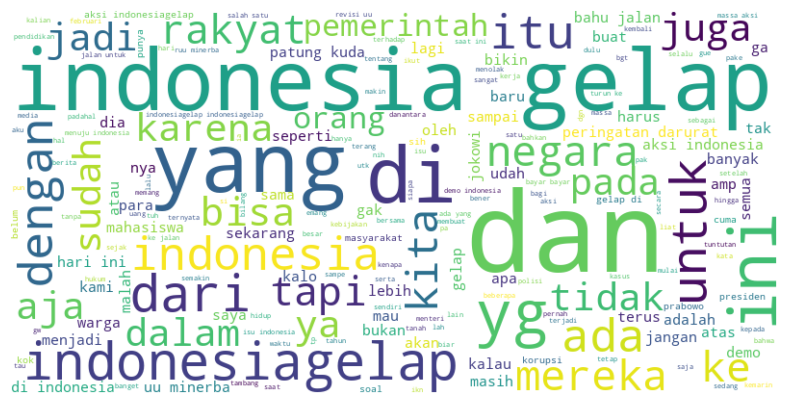

In [ ]:
# prompt: buatkan woldcloud kata yang sering muncul

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks dalam kolom 'Content'
text = " ".join(df['clean_text'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
incorrect_indices = np.where(y_pred_nb != y_test)[0]

In [ ]:
incorrect_indices_knn = np.where(y_pred_knn != y_test)[0]
print("\nIncorrect KNN Predictions:")
for i in incorrect_indices_knn[:2]:
    print("Predicted: >", y_pred_knn[i], "< Actual:",
          y_test.iloc[i], "Text:", X_test.iloc[i])

incorrect_indices_dt = np.where(y_pred_dt != y_test)[0]
print("\nIncorrect DT Predictions:")
for i in incorrect_indices_dt[:2]:
    print("Predicted: >", y_pred_dt[i], "< Actual:",
          y_test.iloc[i], "Text:", X_test.iloc[i])

incorrect_indices_nb = np.where(y_pred_nb != y_test)[0]
print("\nIncorrect NB Predictions:")
for i in incorrect_indices_nb[:2]:
    print("Predicted: >", y_pred_nb[i], "< Actual:",
          y_test.iloc[i], "Text:", X_test.iloc[i])